#### Import data 

In [1]:
import numpy as np
import pandas as pd

In [35]:
xtrain=df_daily[['Rain','Temperature','SoilTemp10cm','SoilTemp30cm', 'SoilTemp50cm' ,'GPP_500']]

In [36]:
ytrain=df_daily[['Soilmoisture10cm','Soilmoisture30cm', 'Soilmoisture50cm']]

In [40]:
def entropy(X, bins):
    binned_dist = np.histogram(X, bins)[0]
    probs = binned_dist / np.sum(binned_dist)
    probs = probs[np.nonzero(probs)]
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

def joint_entropy(X, Y, bins):
    binned_dist = np.histogram2d(X, Y, bins)[0]
    probs = binned_dist / np.sum(binned_dist)
    probs = probs[np.nonzero(probs)]
    joint_entropy = -np.sum(probs * np.log2(probs))
    return joint_entropy

def mutual_info(X, Y, bins):
    H_X = entropy(X, bins)
    H_Y = entropy(Y, bins)
    H_XY = joint_entropy(X, Y, bins)
    MI = H_X + H_Y - H_XY
    return MI

num_bins = 200

for x_column in xtrain.columns:
    mi_scores=[]
    entropy_x = entropy(xtrain[x_column].to_numpy(), num_bins)
    print(f"Entropy for {x_column}: {entropy_x}")
    mi_scores_column = []
    for y_column in ytrain.columns:
        X = xtrain[x_column].to_numpy()
        Y = ytrain[y_column].to_numpy()
        
        joint_entropy_xy = joint_entropy(X, Y, num_bins)
        print(f"Joint Entropy for ({x_column}, {y_column}): {joint_entropy_xy}")

        mutual_information = mutual_info(X, Y, num_bins)
        mi_scores_column.append(mutual_information)
        print(f"Mutual Information between {x_column} and {y_column}: {mutual_information}")
    mi_scores.append(mi_scores_column)
        

Entropy for Rain: 2.1982560812929886
Joint Entropy for (Rain, Soilmoisture10cm): 8.019076182941614
Mutual Information between Rain and Soilmoisture10cm: 1.2910592222800457
Joint Entropy for (Rain, Soilmoisture30cm): 7.917359288872325
Mutual Information between Rain and Soilmoisture30cm: 1.2890778565756476
Joint Entropy for (Rain, Soilmoisture50cm): 8.0352602940297
Mutual Information between Rain and Soilmoisture50cm: 1.297605389093862
Entropy for Temperature: 7.190210492312387
Joint Entropy for (Temperature, Soilmoisture10cm): 9.954960727304744
Mutual Information between Temperature and Soilmoisture10cm: 4.347129088936313
Joint Entropy for (Temperature, Soilmoisture30cm): 9.961036978893276
Mutual Information between Temperature and Soilmoisture30cm: 4.237354577574095
Joint Entropy for (Temperature, Soilmoisture50cm): 9.969510959184603
Mutual Information between Temperature and Soilmoisture50cm: 4.3553091349583575
Entropy for SoilTemp10cm: 7.333454488234739
Joint Entropy for (SoilTemp10

In [38]:
num_bins = 300
mi_scores = []
entropy_scores = []
joint_entropy_scores = []
redudancy=[]

for x_column in xtrain.columns:
    entropy_x = entropy(xtrain[x_column].to_numpy(), num_bins)
    entropy_scores.append(entropy_x)
    mi_scores_column = []
    redudancy_column=[]
    for y_column in ytrain.columns:
        X = xtrain[x_column].to_numpy()
        Y = ytrain[y_column].to_numpy()

        joint_entropy_xy = joint_entropy(X, Y, num_bins)
        joint_entropy_scores.append(joint_entropy_xy)

        mutual_information = mutual_info(X, Y, num_bins)
        min_entropy = min(entropy_x, entropy(Y, num_bins))
        sqrt_entropy= np.sqrt(entropy_x) * np.sqrt(entropy(Y,num_bins))
        normalized_mi = mutual_information / sqrt_entropy if sqrt_entropy != 0 else 0
        mi_scores_column.append(normalized_mi)
        red=mutual_information/(entropy_x+entropy(Y, num_bins))
        redudancy_column.append(red)
        print(f"Mutual Information between {x_column} and {y_column}: {normalized_mi}")
        print(f"Redudancy between {x_column} and {y_column}:{red}")
    mi_scores.append(mi_scores_column)
    redudancy.append(redudancy_column)

Mutual Information between Rain and Soilmoisture10cm: 0.3722846618979577
Redudancy between Rain and Soilmoisture10cm:0.15907180490064643
Mutual Information between Rain and Soilmoisture30cm: 0.37474901983768505
Redudancy between Rain and Soilmoisture30cm:0.16074996113693152
Mutual Information between Rain and Soilmoisture50cm: 0.3773641976547159
Redudancy between Rain and Soilmoisture50cm:0.1610597108155828
Mutual Information between Temperature and Soilmoisture10cm: 0.6924013786748793
Redudancy between Temperature and Soilmoisture10cm:0.34619450791526046
Mutual Information between Temperature and Soilmoisture30cm: 0.6837013221603054
Redudancy between Temperature and Soilmoisture30cm:0.3418194238561855
Mutual Information between Temperature and Soilmoisture50cm: 0.695314210321576
Redudancy between Temperature and Soilmoisture50cm:0.3476545971199502
Mutual Information between SoilTemp10cm and Soilmoisture10cm: 0.7133821682152689
Redudancy between SoilTemp10cm and Soilmoisture10cm:0.3566

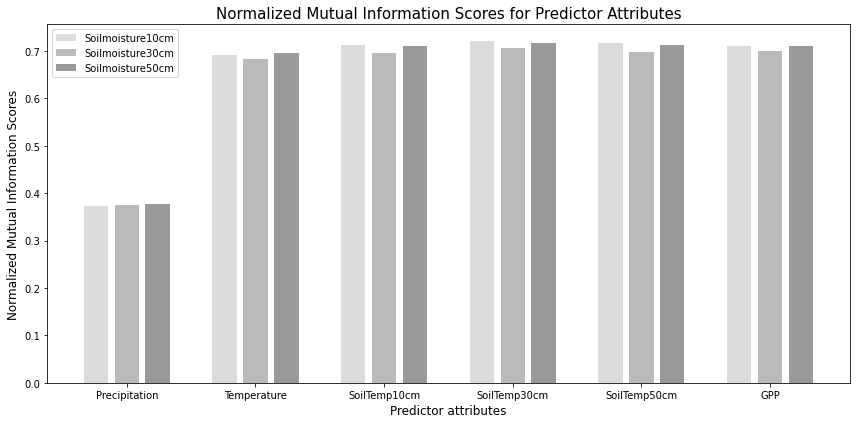

Entropy Scores: [2.4122327921485027, 7.716505142472344, 7.832064872726621, 7.8567674079176335, 7.7821755226815075, 7.92994033031043]
Joint Entropy Scores: [8.440448239948575, 8.327787566846622, 8.448412530294517, 10.030248505020065, 10.022223860196817, 10.029556582469962, 9.944053179614652, 9.998841848277179, 9.991509126004035, 9.906029400095528, 9.947385417949572, 9.954602927556287, 9.885772878124756, 9.955294850106391, 9.942911921596469, 10.023365118215, 10.03253102105643, 10.041247588429783]


In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(xtrain.columns))
bar_width = 0.19  # Adjust the width of the bars
opacity = 0.8
num_targets = len(ytrain.columns)
spacing = 0.05  # Adjust the spacing between groups of bars
colors = ['lightgrey', 'darkgrey', 'grey']  # Define custom colors for the bars

for i, column in enumerate(ytrain.columns):
    values = [row[i] for row in mi_scores]
    ax.bar(index + (bar_width + spacing) * i, values, bar_width, alpha=opacity, label=column, color=colors[i % len(colors)])  # Adjust the position of the bars

ax.set_xlabel('Predictor attributes', fontsize=12)
ax.set_ylabel('Normalized Mutual Information Scores', fontsize=12)
ax.set_title('Normalized Mutual Information Scores for Predictor Attributes', fontsize=15)
ax.set_xticks(index + (bar_width + spacing) * (num_targets - 1) / 2)  # Adjust the position of x ticks
ax.set_xticklabels(['Precipitation', 'Temperature', 'SoilTemp10cm', 'SoilTemp30cm', 'SoilTemp50cm', 'GPP'], rotation=0, ha="center")
ax.legend()

plt.tight_layout()
plt.show()

print("Entropy Scores:", entropy_scores)
print("Joint Entropy Scores:", joint_entropy_scores)
